# Film Performance Exploratory Data Analysis

Aidan O'Keefe

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Case

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

What are the business's pain points related to this project?
How did you pick the data analysis question(s) that you did?
Why are these questions important from a business perspective?

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data Understanding

Describe the data being used for this project. 

We are going to look at data taken from IMDB and The Numbers.com

Questions to consider:

Where did the data come from, and how do they relate to the data analysis questions?
What do the data represent? Who is in the sample and what variables are included?
What is the target variable?
What are the properties of the variables you intend to use?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px

%matplotlib inline

In [2]:
# Here you run your code to explore the data

### IMPORTING SQL DATA FROM IMDB

In [3]:
import sqlite3
conn = sqlite3.connect('/Users/Aidan/Documents/Flatiron/Phase_1/dsc-phase-1-project-v2-4/zippedData/im.db')

In [4]:
q = """

SELECT movie_basics.primary_title AS "Film Name",
        movie_basics.original_title AS "Original Film Name",
        movie_basics.start_year AS "Release Year",
        movie_basics.runtime_minutes AS "Runtime (min)",
        movie_basics.genres AS "Genres",
        movie_ratings.averagerating AS "IMDB Average Rating",
        movie_ratings.numvotes AS "IMDB Votes Count"
        

FROM movie_basics
JOIN movie_ratings
    USING(movie_id)

"""
imdb_df = pd.read_sql(q, conn)

In [5]:
imdb_df.shape

(73856, 7)

In [6]:
imdb_df.head()

,Film Name,Original Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### IMPORTING CSV/TSV DATA

In [7]:
mov_budgets_df = pd.read_csv\
("/Users/Aidan/Documents/Flatiron/Phase_1/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv")

In [8]:
mov_budgets_df.shape

(5782, 6)

In [9]:
mov_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## DATA PREPARATION AND CLEANING

Describe and justify the process for preparing the data for analysis.

Questions to consider:

Were there variables you dropped or created?
How did you address missing values or outliers?
Why are these choices appropriate given the data and the business problem?


In [10]:
# Here you run your code to clean the data

### New Features and Cleaned Data

Stripping the `production_budget` `domestic_gross` and `worldwide_gross` columns of the "$" and commas.
Also turning data type into integers to allow for calculations.

In [11]:
mov_budgets_df['production_budget'] = \
(mov_budgets_df['production_budget'].str.replace(',','').str.replace('$','')).astype(int)

In [12]:
mov_budgets_df['domestic_gross'] = \
(mov_budgets_df['domestic_gross'].str.replace(',','').str.replace('$','')).astype(int)

In [13]:
mov_budgets_df['worldwide_gross'] = \
mov_budgets_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)

Creating new columns `Domestic Profit` and `Worldwide Profit`

In [14]:
mov_budgets_df['Domestic Profit'] = mov_budgets_df['domestic_gross'] - mov_budgets_df['production_budget']

In [15]:
mov_budgets_df['Worldwide Profit'] = mov_budgets_df['worldwide_gross'] - mov_budgets_df['production_budget']

Creating new column `ROI  (percent)` (Return on Investment) for each film. 

`ROI  (percent)` equals 100 X (`Worldwide Profit` minus `production_budget` divided by `production_budget`)

In [16]:
mov_budgets_df["ROI (percent)"] = 100 * ((mov_budgets_df['Worldwide Profit'] - mov_budgets_df['production_budget'])\
                        / mov_budgets_df['production_budget'])

In [17]:
mov_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,453.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,54.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-157.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,224.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,215.369636


Create a `release_year` column from `release_date` in `mov_budgets_df`

In [18]:
mov_budgets_df['release_year'] = [i[-4:] for i in mov_budgets_df["release_date"]]

In [19]:
mov_budgets_df["release_year"].dtype

dtype('O')

In [20]:
mov_budgets_df["release_year"] = mov_budgets_df["release_year"].astype(int)

In [21]:
mov_budgets_df["release_year"].dtype

dtype('int64')

In [22]:
mov_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,453.257713,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,54.667286,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-157.210757,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,224.384139,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,215.369636,2017


### Consolidating Data Frames

#### IMDB Data Base and The Numbers CSV Merge

Merging based on the following columns in each data frame:
- imdb_df('Original Film Name')
- mov_budgets_df ('movie')

In [23]:
imdb_bud_df = imdb_df.merge(mov_budgets_df, how="inner", left_on= "Original Film Name", right_on= "movie")

In [24]:
imdb_bud_df.shape

(2638, 17)

In [25]:
imdb_bud_df= imdb_bud_df[imdb_bud_df["Release Year"] == imdb_bud_df["release_year"]]

In [26]:
imdb_bud_df.head(10)

,Film Name,Original Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),release_year
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,-199.836209,2012
2,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,200000,1109808,1165996,909808,965996,382.998000,2015
6,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,-32763162,96861183,6.440860,2013
7,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,-1982315,34108587,21.816382,2014
8,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864,566.909239,2015
9,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,16,"Oct 28, 2011",The Rum Diary,45000000,13109815,21544732,-31890185,-23455268,-152.122818,2011
10,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570,4,"Apr 13, 2012",The Three Stooges,30000000,44338224,54052249,14338224,24052249,-19.825837,2012
11,Anderson's Cross,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",5.5,106,65,"Dec 31, 2010",Anderson's Cross,300000,0,0,-300000,-300000,-200.000000,2010
12,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,15,"Nov 24, 2010",Tangled,260000000,200821936,586477240,-59178064,326477240,25.568169,2010
13,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,14,"Mar 9, 2012",John Carter,275000000,73058679,282778100,-201941321,7778100,-97.171600,2012


In [27]:
imdb_bud_df.shape

(1489, 17)

Removing unwanted columns

In [28]:
imdb_bud_df = imdb_bud_df.drop(axis=1, columns = \
            ['id','movie','Original Film Name', 'release_year'])

In [29]:
imdb_bud_df.shape

(1489, 13)

### Remove Duplicates

Here we run into the issue of some movies having the same name. These duplicates could include remakes done years later or domestic remake of a foreign film. However we know the release year of these films will differ. We tried to avoid the foreign film issue by merging data sets based on `Original Film Name` rather than `Film Name`.

In [30]:
imdb_bud_df.duplicated(subset=["Film Name", "Release Year"]).value_counts()

False    1464
True       25
dtype: int64

In [31]:
imdb_bud_df[imdb_bud_df.duplicated(subset=["Film Name", "Release Year"]) == True]

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
149,Robin Hood,2018,NaN,None,7.6,5,"Nov 21, 2018",99000000,30824628,84747441,-68175372,-14252559,-114.396524
182,Alice in Wonderland,2010,99.0,"Fantasy,Musical",6.5,6,"Mar 5, 2010",200000000,334191110,1025491110,134191110,825491110,312.745555
209,The Bounty Hunter,2010,NaN,None,6.3,29,"Mar 19, 2010",45000000,67061228,135808837,22061228,90808837,101.797416
263,Big Eyes,2014,NaN,Documentary,7.2,43,"Dec 25, 2014",10000000,14482031,27317872,4482031,17317872,73.178720
265,Burlesque,2010,NaN,Drama,7.0,45,"Nov 24, 2010",55000000,39440655,90552675,-15559345,35552675,-35.358773
280,After,2012,83.0,Romance,6.3,34,"Dec 31, 2012",650000,0,0,-650000,-650000,-200.000000
411,Hercules,2014,112.0,Comedy,6.2,72,"Jul 25, 2014",100000000,72688614,243388614,-27311386,143388614,43.388614
425,The Tempest,2010,131.0,Drama,7.8,94,"Dec 10, 2010",20000000,277943,277943,-19722057,-19722057,-198.610285
488,Cyrus,2010,91.0,"Comedy,Drama,Romance",6.3,32457,"Jun 18, 2010",7000000,7468936,10062896,468936,3062896,-56.244343
708,The Forest,2016,109.0,"Drama,Fantasy,Horror",6.5,222,"Jan 8, 2016",10000000,26594261,40749230,16594261,30749230,207.492300


In [32]:
#EXAMPLE OF A DUPLICATE

imdb_bud_df[(imdb_bud_df['Film Name'] == "Robin Hood") & (imdb_bud_df["Release Year"] == 2018)]

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
147,Robin Hood,2018,116.0,"Action,Adventure,Thriller",5.3,41588,"Nov 21, 2018",99000000,30824628,84747441,-68175372,-14252559,-114.396524
149,Robin Hood,2018,NaN,None,7.6,5,"Nov 21, 2018",99000000,30824628,84747441,-68175372,-14252559,-114.396524


In [33]:
budgets_df = imdb_bud_df.drop_duplicates(subset= ["Film Name", "Release Year"], keep='first', inplace=False)

In [34]:
budgets_df.shape

(1464, 13)

In [35]:
budgets_df.set_index('Film Name', inplace=True)

In [36]:
budgets_df.reset_index(inplace=True)

In [37]:
#EXAMPLE THAT DUPLICATES BY FILM NAME AND YEAR ARE GONE

budgets_df[budgets_df['Film Name'] == "Robin Hood"]

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
112,Robin Hood,2010,140.0,"Action,Adventure,Drama",6.6,239480,"May 14, 2010",210000000,105487148,322459006,-104512852,112459006,-46.448092
113,Robin Hood,2018,116.0,"Action,Adventure,Thriller",5.3,41588,"Nov 21, 2018",99000000,30824628,84747441,-68175372,-14252559,-114.396524


In [38]:
budgets_df.head()

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",45000000,0,73706,-45000000,-44926294,-199.836209
1,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,"Jun 19, 2015",200000,1109808,1165996,909808,965996,382.998000
2,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,-32763162,96861183,6.440860
3,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,-1982315,34108587,21.816382
4,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"Jun 12, 2015",215000000,652270625,1648854864,437270625,1433854864,566.909239


### Dealing with Missing Values

Questions to consider:
<br>
How did you address missing values or outliers?<br>
Why are these choices appropriate given the data and the business problem?


Now let's take a look at the missing values of our newly compiled data frame.

In [39]:
budgets_df.isna().sum()

Film Name              0
Release Year           0
Runtime (min)          4
Genres                 0
IMDB Average Rating    0
IMDB Votes Count       0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
Domestic Profit        0
Worldwide Profit       0
ROI (percent)          0
dtype: int64

We can see we are missing 4 values in `Runtime (min)`. We may be able to impute the missing `Runtime (min)` by looking up the films, however it may be worth simply dropping the records as there are so few of them. I am not analyzing `Runtime (min)` so will leave these records alone.

In [40]:
budgets_df[budgets_df['Runtime (min)'].isna()==True]

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
670,Should've Been Romeo,2012,NaN,"Comedy,Drama",6.5,44,"Dec 31, 2012",5000000,0,0,-5000000,-5000000,-200.000000
811,Destiny,2014,NaN,"Adventure,Comedy,Family",8.4,25,"Dec 31, 2014",750000,0,450,-750000,-749550,-199.940000
1293,The Promise,2017,NaN,Comedy,8.8,53,"Apr 21, 2017",90000000,8224288,10551417,-81775712,-79448583,-188.276203
1327,Romantic Schemer,2015,NaN,Romance,5.3,178,"Dec 31, 2015",125000,0,0,-125000,-125000,-200.000000


### Spitting the Genres column

In [41]:
budgets_df.Genres.value_counts()

Adventure,Animation,Comedy    68
Comedy                        53
Drama                         52
Comedy,Drama,Romance          50
Action,Adventure,Sci-Fi       49
                              ..
Comedy,Drama,Horror            1
Biography,Documentary          1
Documentary,Sport              1
Adventure,Comedy,Romance       1
Action,Adventure,Romance       1
Name: Genres, Length: 228, dtype: int64

In [42]:
#Turn Genres column values into a list
budgets_df.Genres= budgets_df.Genres.apply(lambda x: str(x).split(","))

/Users/Aidan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
budgets_df.head()

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
0,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,-45000000,-44926294,-199.836209
1,The Overnight,2015,79.0,"[Comedy, Mystery]",6.1,14828,"Jun 19, 2015",200000,1109808,1165996,909808,965996,382.998000
2,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,-32763162,96861183,6.440860
3,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,-1982315,34108587,21.816382
4,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,"Jun 12, 2015",215000000,652270625,1648854864,437270625,1433854864,566.909239


In [44]:
#SPLIT GENRE COLUMN INTO COLUMNS

split_genres_df = pd.DataFrame(budgets_df['Genres'].to_list(), columns=['Genre 1','Genre 2', "Genre 3"])

In [45]:
split_genres_df

,Genre 1,Genre 2,Genre 3
0,Action,Animation,Comedy
1,Comedy,Mystery,None
2,Adventure,Comedy,Drama
3,Action,Crime,Drama
4,Action,Adventure,Sci-Fi
...,...,...,...
1459,Action,Comedy,Crime
1460,Drama,Horror,Mystery
1461,Biography,Comedy,Drama
1462,Documentary,None,None


Fill in None values in columns with "-" so 1 or 2 genre films can be inlcuded in Genre Combos Analysis

In [46]:
split_genres_df.isna().sum()

Genre 1      0
Genre 2    151
Genre 3    488
dtype: int64

In [47]:
split_genres_df = split_genres_df.fillna('-')

In [48]:
split_genres_df.isna().sum()

Genre 1    0
Genre 2    0
Genre 3    0
dtype: int64

Merge the new `split_genres_df` into the main dataframe `budgets_df`

In [49]:
genres_df = budgets_df.merge(split_genres_df, left_index=True, right_index=True)
genres_df

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),Genre 1,Genre 2,Genre 3
0,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,-45000000,-44926294,-199.836209,Action,Animation,Comedy
1,The Overnight,2015,79.0,"[Comedy, Mystery]",6.1,14828,"Jun 19, 2015",200000,1109808,1165996,909808,965996,382.998000,Comedy,Mystery,-
2,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,-32763162,96861183,6.440860,Adventure,Comedy,Drama
3,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,-1982315,34108587,21.816382,Action,Crime,Drama
4,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,"Jun 12, 2015",215000000,652270625,1648854864,437270625,1433854864,566.909239,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Teefa in Trouble,2018,155.0,"[Action, Comedy, Crime]",7.4,2724,"Jul 20, 2018",1500000,0,98806,-1500000,-1401194,-193.412933,Action,Comedy,Crime
1460,Happy Death Day 2U,2019,100.0,"[Drama, Horror, Mystery]",6.3,27462,"Feb 13, 2019",9000000,28051045,64179495,19051045,55179495,513.105500,Drama,Horror,Mystery
1461,Blinded by the Light,2019,117.0,"[Biography, Comedy, Drama]",6.2,173,"Aug 14, 2019",15000000,0,0,-15000000,-15000000,-200.000000,Biography,Comedy,Drama
1462,Fahrenheit 11/9,2018,128.0,[Documentary],6.7,11628,"Sep 21, 2018",5000000,6352306,6653715,1352306,1653715,-66.925700,Documentary,-,-


Reassign the column `Genres` to `genres_df` with the split Genres consolidated

In [50]:
genres_df['Genres'] = genres_df["Genre 1"] + " " + genres_df["Genre 2"] + " " +\
                    genres_df["Genre 3"]

In [51]:
genres_df.head()

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),Genre 1,Genre 2,Genre 3
0,Foodfight!,2012,91.0,Action Animation Comedy,1.9,8248,"Dec 31, 2012",45000000,0,73706,-45000000,-44926294,-199.836209,Action,Animation,Comedy
1,The Overnight,2015,79.0,Comedy Mystery -,6.1,14828,"Jun 19, 2015",200000,1109808,1165996,909808,965996,382.998000,Comedy,Mystery,-
2,The Secret Life of Walter Mitty,2013,114.0,Adventure Comedy Drama,7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,-32763162,96861183,6.440860,Adventure,Comedy,Drama
3,A Walk Among the Tombstones,2014,114.0,Action Crime Drama,6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,-1982315,34108587,21.816382,Action,Crime,Drama
4,Jurassic World,2015,124.0,Action Adventure Sci-Fi,7.0,539338,"Jun 12, 2015",215000000,652270625,1648854864,437270625,1433854864,566.909239,Action,Adventure,Sci-Fi


## Data Modeling


Describe and justify the process for analyzing or modeling the data.

Questions to consider:

How did you analyze or model the data?
How did you iterate on your initial approach to make it better?
Why are these choices appropriate given the data and the business problem?

We want movies that are CURRENTLY doing best. We earlier defined currently as within the last 10 years.

Check `'Release Year` to see how current our movie set is. 

In [52]:
genres_df['Release Year'].value_counts()

2015    189
2014    178
2010    177
2011    175
2013    161
2012    159
2016    156
2018    120
2017    116
2019     33
Name: Release Year, dtype: int64

Shows our films are all from 2010 to 2019 which is what we want.

#### DEALING WITH OUTLIERS

Using median values that are less affected by outliers will help keep data more accurate for values across an entire genre/ genre combination.

## Focusing on Return on Investment (ROI)

Now what are the 10 Genre Combinations with the greatest ROI?

In [53]:
top_10_genres_ROI = genres_df.groupby(['Genres']).median()\
.sort_values(by = 'ROI (percent)', ascending=False).head(10)

top_10_genres_ROI 

,Release Year,Runtime (min),IMDB Average Rating,IMDB Votes Count,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
Genres,,,,,,,,,,
Biography Drama Fantasy,2018.0,99.0,5.40,24351.0,3500000.0,25091816.0,44378040.0,21591816.0,40878040.0,1067.944000
Drama Sci-Fi Thriller,2013.0,93.0,6.80,133793.0,12000000.0,64575175.0,123681790.0,52575175.0,111681790.0,830.681583
Comedy Documentary -,2013.0,89.0,6.80,7880.0,2500000.0,23591043.0,23591043.0,13591043.0,13591043.0,828.324800
Horror Mystery Thriller,2015.0,93.0,5.35,43104.0,8500000.0,33071013.5,80442219.0,24749605.5,63090163.0,825.322645
Action Mystery Sci-Fi,2014.0,113.0,6.80,387038.0,34000000.0,102427862.0,348319861.0,68427862.0,314319861.0,824.470179
Adventure Drama Fantasy,2012.0,123.0,7.30,211733.0,19500000.0,63859435.0,195790794.0,10995746.0,176290794.0,804.055354
Action Comedy Documentary,2010.0,95.0,7.00,53289.0,20000000.0,117229692.0,171685793.0,97229692.0,151685793.0,658.428965
Adventure Horror Mystery,2014.0,93.0,6.20,66892.0,5000000.0,21222315.0,41824066.0,16222315.0,36824066.0,636.481320
Comedy Fantasy -,2012.5,96.0,5.70,97841.0,27000000.0,38642550.5,67959812.5,25435585.0,40709812.5,621.102389


In [54]:
#Visualization of Top 10 Genre Combinations by ROI

In [55]:
top_10_genres_ROI  = top_10_genres_ROI.reset_index()

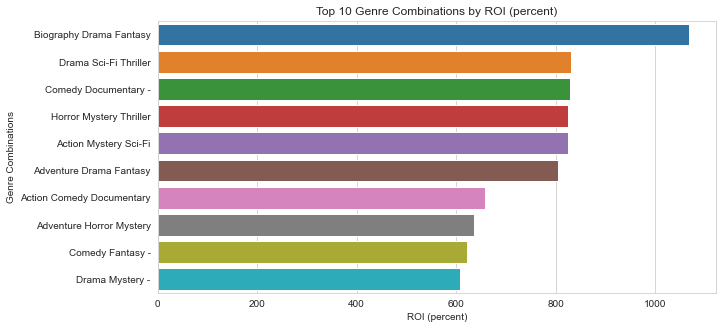

In [56]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x = top_10_genres_ROI['ROI (percent)'], y = top_10_genres_ROI["Genres"])

ax.set_title('Top 10 Genre Combinations by ROI (percent)')

ax.set_xlabel('ROI (percent)')
ax.set_ylabel('Genre Combinations');


From the chart above, we can see that Biography Drama Fantasy has the best ROI by far. The next five genre combinations (Drama Sci-Fi Thriller, Comedy Documentary, Horror Mystery Thriller, Action Mystery Sci-Fi, and Adventure Drama Fantasy) are practically tied for second at around the 800% ROI mark. 

In [57]:
#Create a list of the Genres in top_10_genres_ROI
roi_genres = list(top_10_genres_ROI['Genres'])
roi_genres

['Biography Drama Fantasy',
 'Drama Sci-Fi Thriller',
 'Comedy Documentary -',
 'Horror Mystery Thriller',
 'Action Mystery Sci-Fi',
 'Adventure Drama Fantasy',
 'Action Comedy Documentary',
 'Adventure Horror Mystery',
 'Comedy Fantasy -',
 'Drama Mystery -']

In [58]:
#Create a new datafram subset of only movies with genres in top_10_genres_ROI

roi_genres_df = genres_df.loc[genres_df["Genres"].isin(roi_genres)]

Let's look at films in our top ROI Genre "Biography Drama Fantasy":

In [116]:
roi_genres_df[roi_genres_df["Genres"] == "Biography Drama Fantasy"].head()

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),Genre 1,Genre 2,Genre 3
160,Winchester,2018,99.0,Biography Drama Fantasy,5.4,24351,"Feb 2, 2018",3500000,25091816,44378040,21591816,40878040,1067.944,Biography,Drama,Fantasy


Only one film, "Winchester", seems to match that genre in our data, which does not help us understand if making a "Biography Drama Fantasy" film would result in a consistently high ROI.

In [115]:
roi_genres_df.head()

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),Genre 1,Genre 2,Genre 3
12,The Possession,2012,92.0,Horror Mystery Thriller,5.9,53649,"Aug 31, 2012",14000000,49130588,82925064,35130588,68925064,392.321886,Horror,Mystery,Thriller
24,Life of Pi,2012,127.0,Adventure Drama Fantasy,7.9,535836,"Nov 21, 2012",120000000,124987022,620912003,4987022,500912003,317.426669,Adventure,Drama,Fantasy
82,Pet Sematary,2019,101.0,Horror Mystery Thriller,6.0,34472,"Apr 5, 2019",21000000,54724696,109501146,33724696,88501146,321.434029,Horror,Mystery,Thriller
89,My Soul to Take,2010,107.0,Horror Mystery Thriller,4.8,18381,"Oct 8, 2010",25000000,14744435,16727470,-10255565,-8272530,-133.090120,Horror,Mystery,Thriller
160,Winchester,2018,99.0,Biography Drama Fantasy,5.4,24351,"Feb 2, 2018",3500000,25091816,44378040,21591816,40878040,1067.944000,Biography,Drama,Fantasy


How has ROI in the above 10 Genre Combinations changed over the last 10 years?

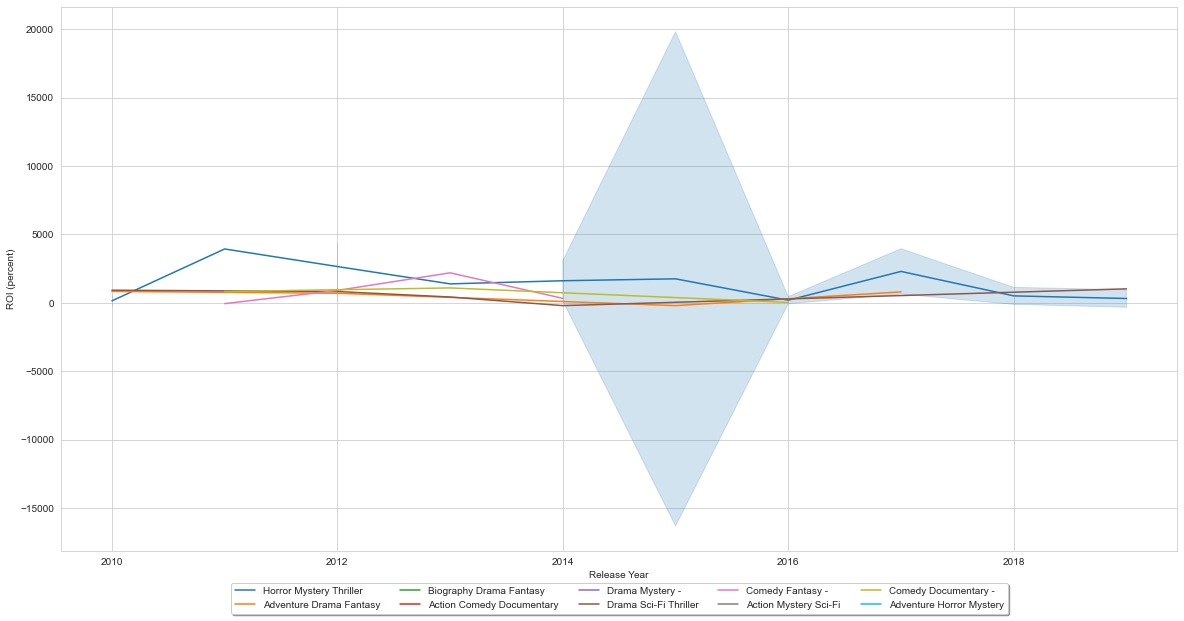

In [89]:
#Create a linegraph of ROI over the past 10 years by Genres

fig, ax =plt.subplots(figsize =(20,10))

sns.lineplot(data=roi_genres_df, x="Release Year", y= "ROI (percent)", hue="Genres", ci='sd', estimator ="median")

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

A very high outlier in 2015 seems to be pulling up the ROI for Horror Mystery Thriller category

In [61]:
roi_genres_df[roi_genres_df["Genres"] == "Horror Mystery Thriller"]\
.sort_values(by = "ROI (percent)", ascending = False)

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),Genre 1,Genre 2,Genre 3
973,The Gallows,2015,81.0,Horror Mystery Thriller,4.2,17763,"Jul 10, 2015",100000,22764410,41656474,22664410,41556474,41456.474000,Horror,Mystery,Thriller
1371,Get Out,2017,104.0,Horror Mystery Thriller,7.7,400474,"Feb 24, 2017",5000000,176040665,255367951,171040665,250367951,4907.359020,Horror,Mystery,Thriller
830,Chernobyl Diaries,2012,86.0,Horror Mystery Thriller,5.0,60304,"May 25, 2012",1000000,18119640,42411721,17119640,41411721,4041.172100,Horror,Mystery,Thriller
707,Paranormal Activity 3,2011,83.0,Horror Mystery Thriller,5.8,85689,"Oct 21, 2011",5000000,104028807,207039844,99028807,202039844,3940.796880,Horror,Mystery,Thriller
1173,Annabelle,2014,99.0,Horror Mystery Thriller,5.4,122039,"Oct 3, 2014",6500000,84273813,256862920,77773813,250362920,3751.737231,Horror,Mystery,Thriller
793,Sinister,2012,110.0,Horror Mystery Thriller,6.8,198345,"Oct 12, 2012",3000000,48086903,87727807,45086903,84727807,2724.260233,Horror,Mystery,Thriller
876,Paranormal Activity 4,2012,88.0,Horror Mystery Thriller,4.6,58408,"Oct 19, 2012",5000000,53900335,142817992,48900335,137817992,2656.359840,Horror,Mystery,Thriller
1385,Happy Death Day,2017,96.0,Horror Mystery Thriller,6.5,87132,"Oct 13, 2017",5000000,55683845,125010260,50683845,120010260,2300.205200,Horror,Mystery,Thriller
215,Ouija,2014,89.0,Horror Mystery Thriller,4.5,44054,"Oct 24, 2014",5000000,50856010,103300632,45856010,98300632,1866.012640,Horror,Mystery,Thriller
1378,Annabelle: Creation,2017,109.0,Horror Mystery Thriller,6.5,90402,"Aug 11, 2017",15000000,102092201,305384865,87092201,290384865,1835.899100,Horror,Mystery,Thriller


The explosive ROI success of The Gallows in 2015 seems to be what is skewing the graph. Let's remove it for now to get a clearer overall picture.

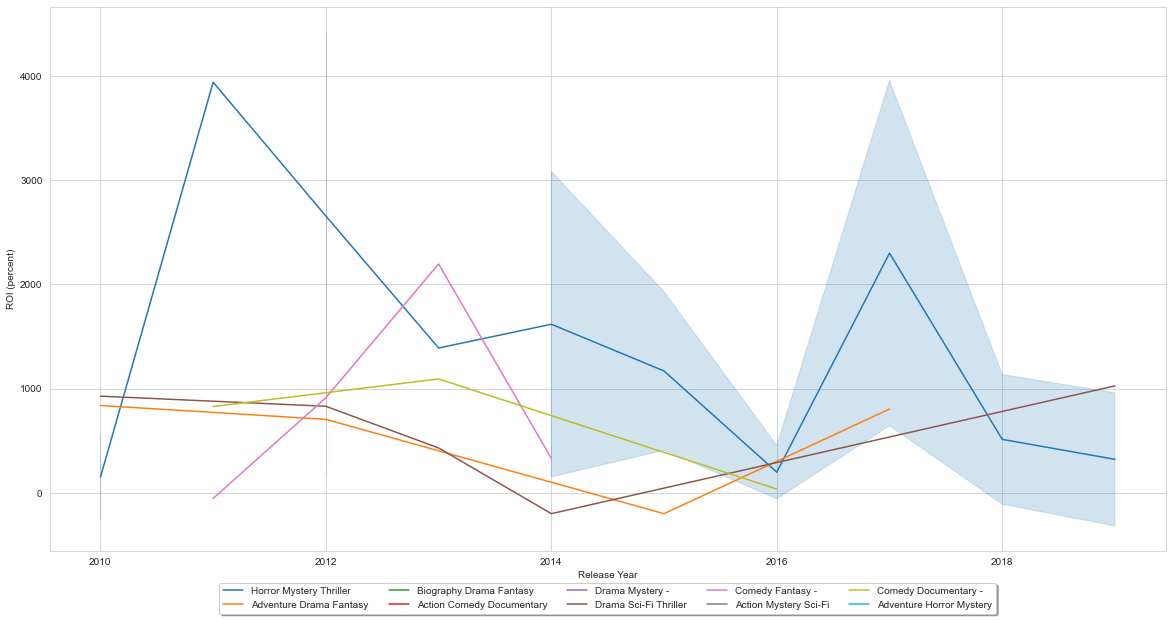

In [101]:
#LINEGRAPH WITHOUT THE GALLOWS OUTLIER

fig, ax =plt.subplots(figsize =(20,10))

sns.lineplot(data=roi_genres_df[roi_genres_df["Film Name"]!= "The Gallows"],\
             x="Release Year", y="ROI (percent)", hue="Genres", ci='sd', estimator ="median")

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

Without The Gallows, it seems ROI for Horror Mystery Thriller is trending downwards, while ROIs for Adventure Drama Fantasy and Drama Sci-Fi Thriller are trending upwards.

How many movies of each of these genres have been made over the last 10 years?

In [63]:
roi_genres_df["Release Year"].value_counts()

2014    9
2012    9
2015    6
2010    6
2016    5
2019    4
2018    4
2017    4
2013    4
2011    3
Name: Release Year, dtype: int64

In [64]:
roi_genres_df.groupby(["Release Year", "Genres"]).count()

Film Name  Runtime (min)  \
Release Year Genres                                                
2010         Action Comedy Documentary          1              1   
             Adventure Drama Fantasy            1              1   
             Drama Mystery -                    1              1   
             Drama Sci-Fi Thriller              1              1   
             Horror Mystery Thriller            2              2   
2011         Comedy Documentary -               1              1   
             Comedy Fantasy -                   1              1   
             Horror Mystery Thriller            1              1   
2012         Adventure Drama Fantasy            2              2   
             Comedy Fantasy -                   1              1   
             Drama Sci-Fi Thriller              1              1   
             Horror Mystery Thriller            5              5   
2013         Comedy Documentary -               1              1   
             Comedy Fantasy -                   1              1   
             Drama Sci-Fi Thriller              1              1   
             Horror Mystery Thriller            1              1   
2014         Action Mystery Sci-Fi              1              1   
             Adventure Horror Mystery           1              1   
             Comedy Fantasy -                   1              1   
             Drama Sci-Fi Thriller              1              1   
             Horror Mystery Thriller            5              5   
2015         Adventure Drama Fantasy            1              1   
             Horror Mystery Thriller            5              5   
2016         Comedy Documentary -               1              1   
             Horror Mystery Thriller            4              4   
2017         Adventure Drama Fantasy            1              1   
             Horror Mystery Thriller            3              3   
2018         Biography Drama Fantasy            1              1   
             Horror Mystery Thriller            3              3   
2019         Drama Sci-Fi Thriller              1              1   
             Horror Mystery Thriller            3              3   

                                        IMDB Average Rating  IMDB Votes Count  \
Release Year Genres                                                             
2010         Action Comedy Documentary                    1                 1   
             Adventure Drama Fantasy                      1                 1   
             Drama Mystery -                              1                 1   
             Drama Sci-Fi Thriller                        1                 1   
             Horror Mystery Thriller                      2                 2   
2011         Comedy Documentary -                         1                 1   
             Comedy Fantasy -                             1                 1   
             Horror Mystery Thriller                      1                 1   
2012         Adventure Drama Fantasy                      2                 2   
             Comedy Fantasy -                             1                 1   
             Drama Sci-Fi Thriller                        1                 1   
             Horror Mystery Thriller                      5                 5   
2013         Comedy Documentary -                         1                 1   
             Comedy Fantasy -                             1                 1   
             Drama Sci-Fi Thriller                        1                 1   
             Horror Mystery Thriller                      1                 1   
2014         Action Mystery Sci-Fi                        1                 1   
             Adventure Horror Mystery                     1                 1   
             Comedy Fantasy -                             1                 1   
             Drama Sci-Fi Thriller                        1                 1   
             

By looking at the above data, we can see that practically all of these genres have 1 film made a year except for Horror Mystery Thriller which consistently has had 2 or more films made a year for 8 out of the last 10 years. This tells us that there is much more competition in the Horror Mystery Thriller genre segment.

### Recommendation:

Based on ROI trends in the industry, I would recommend making a Drama Sci-Fi Thriller film due to a rising ROI trend and low competition. This trend could also signify Drama Sci-Fi Thriller overtaking Horror Mystery Thriller as the top Thriller genre. Secondarily, I would recommend Adventure Drama Fantasy films as they also have a positive ROI trend and their dip also coincides with 2015 when the Gallows dominated the box office. 

## Focusing on Worldwide Profits

Now what are the 10 Genre Combinations with the largest Worldwide Profit?

In [65]:
top_10_genres_WWP = genres_df.groupby(['Genres']).median()\
.sort_values(by = 'Worldwide Profit', ascending=False).head(10)

top_10_genres_WWP 

,Release Year,Runtime (min),IMDB Average Rating,IMDB Votes Count,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
Genres,,,,,,,,,,
Family Fantasy Musical,2017.0,129.0,7.2,238325.0,160000000.0,504014165.0,1.259200e+09,344014165.0,1.099200e+09,586.999816
Adventure Fantasy -,2013.0,144.0,7.4,438621.0,250000000.0,255119788.0,9.455776e+08,5119788.0,6.955776e+08,178.231048
Adventure Drama Sci-Fi,2014.5,156.5,8.3,989725.0,136500000.0,208225778.5,6.608254e+08,71725778.5,5.243254e+08,305.299553
Drama Family Fantasy,2015.0,105.0,6.9,142792.0,95000000.0,201151353.0,5.345514e+08,106151353.0,4.395514e+08,362.685635
Action Adventure Animation,2014.0,100.0,7.3,176699.0,135000000.0,160791800.0,5.175991e+08,19260504.0,3.902583e+08,195.228987
Animation Comedy Family,2012.0,91.0,7.1,115951.0,75000000.0,169700110.0,4.695003e+08,89700110.0,3.895003e+08,386.875372
Action Adventure Sci-Fi,2014.0,128.0,6.9,356556.0,170000000.0,176654505.0,5.425375e+08,25195589.0,3.690761e+08,144.495576
Action Mystery Sci-Fi,2014.0,113.0,6.8,387038.0,34000000.0,102427862.0,3.483199e+08,68427862.0,3.143199e+08,824.470179
Biography Drama Musical,2017.0,105.0,7.6,199663.0,84000000.0,174340174.0,3.866656e+08,90340174.0,3.026656e+08,260.316131


In [66]:
top_10_genres_WWP  = top_10_genres_WWP.reset_index()

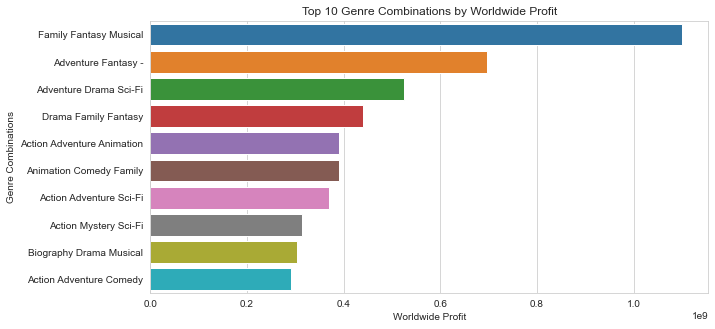

In [67]:
#Visualization of Top 10 Genre Combinations by Worldwide Profit
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x = top_10_genres_WWP['Worldwide Profit'], y = top_10_genres_WWP["Genres"])

ax.set_title('Top 10 Genre Combinations by Worldwide Profit')

ax.set_xlabel('Worldwide Profit')
ax.set_ylabel('Genre Combinations');


From the chart above, Family Fantasy Musical seems to have the largest Worldwide Profit followed by Adventure Fantasy. All ten of these genres made a profit of over $200,000,000.

How has Worldwide Profit in the above 10 Genre Combinations changed over the last 10 years?

In [68]:
#Create a list of the Genres in top_10_genres_ROI
wwp_genres = list(top_10_genres_WWP['Genres'])
wwp_genres

['Family Fantasy Musical',
 'Adventure Fantasy -',
 'Adventure Drama Sci-Fi',
 'Drama Family Fantasy',
 'Action Adventure Animation',
 'Animation Comedy Family',
 'Action Adventure Sci-Fi',
 'Action Mystery Sci-Fi',
 'Biography Drama Musical',
 'Action Adventure Comedy']

In [69]:
#Create a new datafram subset of only movies with genres in top_10_genres_WWP

wwp_genres_df = genres_df.loc[genres_df["Genres"].isin(wwp_genres)]

Let's look at films in our top Worldwide Profit Genre "Family Fantasy Musical":

In [119]:
wwp_genres_df[wwp_genres_df["Genres"] == "Family Fantasy Musical"].head()

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),Genre 1,Genre 2,Genre 3
1099,Beauty and the Beast,2017,129.0,Family Fantasy Musical,7.2,238325,"Mar 17, 2017",160000000,504014165,1259199706,344014165,1099199706,586.999816,Family,Fantasy,Musical


Only one film, "Beauty and the Beast", seems to match that genre in our data, which does not help us understand if making a "Family Fantasy Musical" film would result in a consistently high worldwide profit. This movie was also a live-action remake of a beloved animation movie which likely affected the profit. 

In [70]:
wwp_genres_df.head()

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),Genre 1,Genre 2,Genre 3
4,Jurassic World,2015,124.0,Action Adventure Sci-Fi,7.0,539338,"Jun 12, 2015",215000000,652270625,1648854864,437270625,1433854864,566.909239,Action,Adventure,Sci-Fi
9,John Carter,2012,132.0,Action Adventure Sci-Fi,6.6,241792,"Mar 9, 2012",275000000,73058679,282778100,-201941321,7778100,-97.171600,Action,Adventure,Sci-Fi
17,Alita: Battle Angel,2019,122.0,Action Adventure Sci-Fi,7.5,88207,"Feb 14, 2019",170000000,85710210,402976036,-84289790,232976036,37.044727,Action,Adventure,Sci-Fi
20,Shazam!,2019,132.0,Action Adventure Comedy,7.4,109051,"Apr 5, 2019",85000000,139606856,362899733,54606856,277899733,226.940862,Action,Adventure,Comedy
21,Puss in Boots,2011,90.0,Action Adventure Animation,6.6,133355,"Oct 28, 2011",130000000,149260504,554987477,19260504,424987477,226.913444,Action,Adventure,Animation


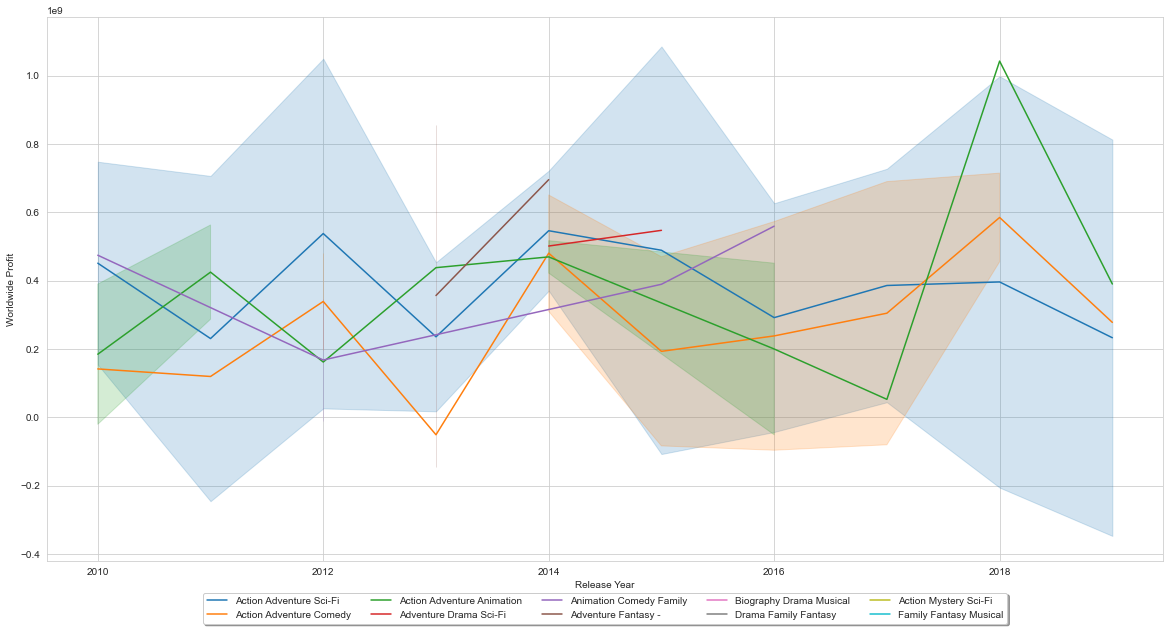

In [118]:
#Create a linegraph of Worldwide Profit over the past 10 years by the above genres

fig, ax = plt.subplots(figsize =(20,10))

sns.lineplot(data=wwp_genres_df, x="Release Year", y="Worldwide Profit", hue="Genres", ci='sd', estimator ="median")

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

There is a lot of movement in the Action Adventure genres (AA Sci-Fi, AA Comedy, AA Animation) and although they seem to provide the highest worldwide profit, they also entail considerable risk. With fewer data points, Animation Comedy Family, Adventure Fantasy, and Biography Drama Musical seem to all have consistent upwards trends in profit since 2012.

What is the ditribution for each of these 10 genres with high median worldwide profit?

In [72]:
wwp_genres_df.groupby(["Release Year", "Genres"]).count()

Film Name  Runtime (min)  \
Release Year Genres                                                 
2010         Action Adventure Animation          2              2   
             Action Adventure Comedy             1              1   
             Action Adventure Sci-Fi             3              3   
             Animation Comedy Family             1              1   
2011         Action Adventure Animation          3              3   
             Action Adventure Comedy             1              1   
             Action Adventure Sci-Fi             3              3   
2012         Action Adventure Animation          1              1   
             Action Adventure Comedy             2              2   
             Action Adventure Sci-Fi             5              5   
             Animation Comedy Family             2              2   
2013         Action Adventure Animation          1              1   
             Action Adventure Comedy             1              1   
             Action Adventure Sci-Fi             9              9   
             Adventure Fantasy -                 2              2   
2014         Action Adventure Animation          3              3   
             Action Adventure Comedy             2              2   
             Action Adventure Sci-Fi             6              6   
             Action Mystery Sci-Fi               1              1   
             Adventure Drama Sci-Fi              1              1   
             Adventure Fantasy -                 1              1   
2015         Action Adventure Comedy             2              2   
             Action Adventure Sci-Fi             5              5   
             Adventure Drama Sci-Fi              1              1   
             Animation Comedy Family             1              1   
             Drama Family Fantasy                1              1   
2016         Action Adventure Animation          2              2   
             Action Adventure Comedy             3              3   
             Action Adventure Sci-Fi             4              4   
             Animation Comedy Family             1              1   
2017         Action Adventure Animation          1              1   
             Action Adventure Comedy             5              5   
             Action Adventure Sci-Fi             3              3   
             Biography Drama Musical             1              1   
             Family Fantasy Musical              1              1   
2018         Action Adventure Animation          1              1   
             Action Adventure Comedy             2              2   
             Action Adventure Sci-Fi             8              8   
2019         Action Adventure Animation          1              1   
             Action Adventure Comedy             1              1   
             Action Adventure Sci-Fi             3              3   

                                         IMDB Average Rating  \
Release Year Genres                                            
2010         Action Adventure Animation                    2   
             Action Adventure Comedy                       1   
             Action Adventure Sci-Fi                       3   
             Animation Comedy Family                       1   
2011         Action Adventure Animation                    3   
             Action Adventure Comedy                       1   
             Action Adventure Sci-Fi                       3   
2012         Action Adventure Animation                    1   
             Action Adventure Comedy                       2   
             Action Adventure Sci-Fi                       5   
             Animation Comedy Family                       2   
2013         Action Adventure Animation                    1   
             Action Adventure Comedy                       1   
             Action Adventure Sci-Fi                       9   
             Adventure Fantasy -                 

This data shows us that by far the greatest number of films in the Top 10 Worldwide Profits have been made in Action Adventure. This indicates a very competitive marketplace and possibly an over-saturated genre.

### Recommendation:

For greatest worldwide profit, I would recommend making Adventure Comedy Family films as they have a consistent upwards trend in worldwide profit in a much less competitive genre category (An Adventure Comedy Family film has not been made since 2016).

## Focusing on Ratings

This information is valuable if Microsoft is aiming to create well-regarded (i.e. highly-rated) movies 

Can I see what are the 10 Genre Combinations with the highest collective IMDB Average Rating?
<br> Films with a considerable amount of votes have more valuable average ratings so let's limit ourselves to genres with over 5000 `IMDB Votes Count`

In [73]:
top_ten_genres_ratings = genres_df[genres_df['IMDB Votes Count'] >= 5000].groupby('Genres').median()\
.sort_values(by = 'IMDB Average Rating', ascending=False).head(10)

top_ten_genres_ratings

,Release Year,Runtime (min),IMDB Average Rating,IMDB Votes Count,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
Genres,,,,,,,,,,
Drama Mystery War,2010.0,131.0,8.3,124156.0,6800000.0,6857096.0,16038343.0,57096.0,9238343.0,35.857985
Adventure Drama Sci-Fi,2014.5,156.5,8.3,989725.0,136500000.0,208225778.5,660825409.0,71725778.5,524325409.0,305.299553
Crime Documentary -,2010.0,109.0,8.3,65304.0,2000000.0,4311834.0,7799257.0,2311834.0,5799257.0,189.962850
Action Drama -,2017.0,167.0,8.3,65656.0,30000000.0,18985794.0,263502914.0,-11014206.0,233502914.0,678.343047
Mystery Thriller -,2010.0,138.0,8.1,1005960.0,80000000.0,128012934.0,299461782.0,48012934.0,219461782.0,174.327227
Action Comedy Drama,2015.0,163.0,8.0,63747.0,13000000.0,8178001.0,121778347.0,-4821999.0,108778347.0,736.756515
Action Sci-Fi -,2014.0,113.0,7.9,546284.0,178000000.0,100206256.0,370541256.0,-77793744.0,192541256.0,8.169245
Documentary Drama -,2012.0,103.0,7.7,19538.0,100000.0,0.0,0.0,-100000.0,-100000.0,-200.000000
Adventure Drama Western,2010.0,110.0,7.6,284034.0,35000000.0,171243005.0,252276928.0,136243005.0,217276928.0,520.791223


In [74]:
#Visualization of Top 10 Genre Combinations by IMDB Average Rating

In [75]:
top_ten_genres_ratings = top_ten_genres_ratings.reset_index()

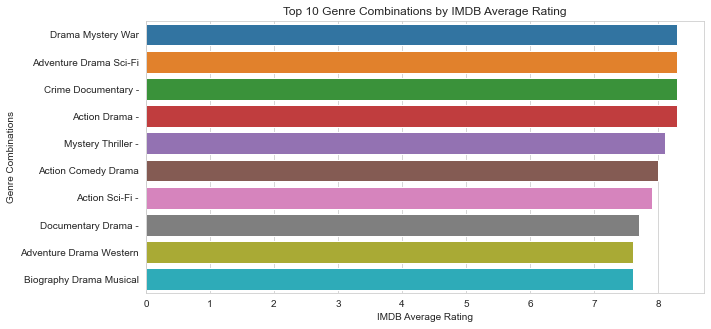

In [76]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x = top_ten_genres_ratings['IMDB Average Rating'], y = top_ten_genres_ratings["Genres"])

ax.set_title('Top 10 Genre Combinations by IMDB Average Rating')

ax.set_xlabel('IMDB Average Rating')
ax.set_ylabel('Genre Combinations');

Interpretation of results

How have average Ratings in the above 10 Genre Combinations changed over the last 10 years?
<br>
<br>This could indicate an increasing popularity of a genre or that studios have gotten better at making a certain genre.

In [77]:
#Create a list of the Genres in top_10_genres_ratings
ratings_genres = list(top_ten_genres_ratings['Genres'])
ratings_genres

['Drama Mystery War',
 'Adventure Drama Sci-Fi',
 'Crime Documentary -',
 'Action Drama -',
 'Mystery Thriller -',
 'Action Comedy Drama',
 'Action Sci-Fi -',
 'Documentary Drama -',
 'Adventure Drama Western',
 'Biography Drama Musical']

In [78]:
#Create a new dataframe subset of only movies with genres in top_10_genres_ratings
ratings_genres_df = genres_df.loc[genres_df["Genres"].isin(ratings_genres)]

In [79]:
ratings_genres_df.shape

(17, 16)

In [80]:
ratings_genres_df["Release Year"].value_counts()

2010    5
2015    4
2014    2
2012    2
2017    2
2011    1
2016    1
Name: Release Year, dtype: int64

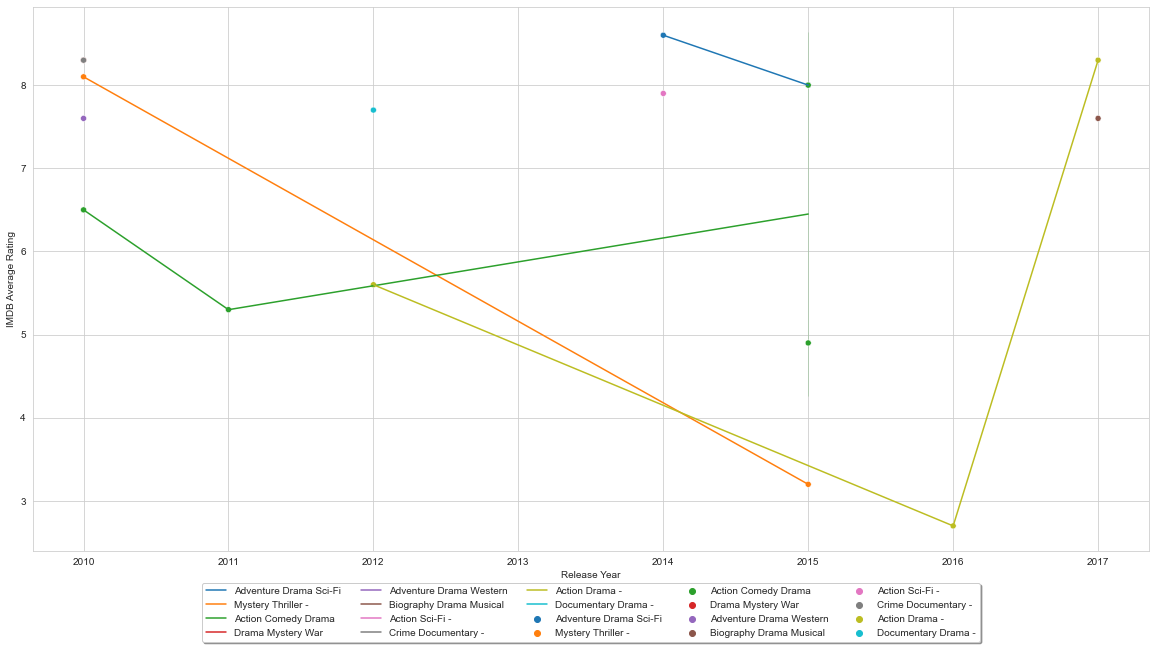

In [82]:
#Create a linegraph of Average Ratings over the past 10 years by the above genres

fig, ax =plt.subplots(figsize =(20,10))

sns.lineplot(data=ratings_genres_df, x="Release Year", y="IMDB Average Rating", hue="Genres", ci='sd', \
estimator="median")

sns.scatterplot(data=ratings_genres_df, x="Release Year", y="IMDB Average Rating", hue="Genres")

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

Interpretation of results

### Recommendation:

recommendation

## Evaluation


Evaluate how well your work solves the stated business problem.

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model?
- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?


## Conclusions


Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project?